In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---
We shall now consider a dataset about Crime complaints in Chicago over a period of several years.

In [515]:
df = pd.read_csv('Crime3.csv', index_col=2, parse_dates=True, infer_datetime_format=True)
df[:5]

,Case Number,Block,HourOfDay,IUCR,PrimaryType,Description,Location,Arrest,Domestic,dummy
Date,,,,,,,,,,
2007-09-27 17:40:00,HN614916,024XX W CERMAK RD,17,0460,BATTERY,SIMPLE,RESTAURANT,0,0,1
2007-09-21 10:20:00,HN602086,079XX S DOBSON AVE,10,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,1,0,1
2007-09-28 12:40:00,HN616458,024XX N KEELER AVE,12,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,1,0,1
2007-09-28 03:30:00,HN616660,071XX S EAST END AVE,3,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,0,0,1
2007-09-27 22:00:00,HN616362,018XX W DIVERSEY PKWY,22,0820,THEFT,$500 AND UNDER,STREET,0,0,1


## [Q2 5 points] Plot the frequencies of the top 20 most common Primary Types

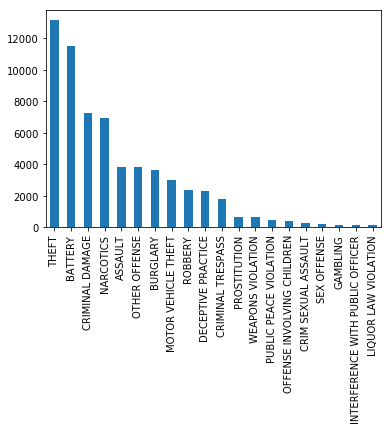

In [6]:
primarycount = df['PrimaryType'].value_counts()[:20].plot(kind="bar")
primarycount

## [Q3 5 points] Find the top 10 most common descriptions for Primary Type NARCOTICS

In [20]:
#dogs_adopted_age = dogs_adopted.groupby(["Age_Bucket"])["time_in_shelter_days"].mean()
primary_narcotics = df[df['PrimaryType'] == 'NARCOTICS']
primary_descriptions = primary_narcotics.groupby(['PrimaryType', 'Description'])['Description'].count().sort_values(ascending=False)[:10]
primary_descriptions

PrimaryType  Description                   
NARCOTICS    POSS: CANNABIS 30GMS OR LESS      2695
             POSS: CRACK                       1187
             POSS: HEROIN(WHITE)                918
             POSS: COCAINE                      256
             MANU/DELIVER:CRACK                 249
             SOLICIT NARCOTICS ON PUBLICWAY     247
             MANU/DELIVER: HEROIN (WHITE)       236
             ATTEMPT POSSESSION NARCOTICS       192
             POSS: CANNABIS MORE THAN 30GMS     161
             FOUND SUSPECT NARCOTICS            147
Name: Description, dtype: int64

## [Q4 5 points] Among incidents that are Domestic and lead to Arrests, what are the top 10 most frequent Primary Types?

In [41]:
#need to create a mask that looks at those that are domestic and lead to arrests
domestic = (df['Domestic'] == 1)
arrests = (df['Arrest'] == 1)

mask = (domestic & arrests)

da = df[mask]['PrimaryType'].value_counts().sort_values(ascending=False)[:10]
da

BATTERY                       1034
OTHER OFFENSE                  170
ASSAULT                        158
CRIMINAL DAMAGE                 84
OFFENSE INVOLVING CHILDREN      46
THEFT                           27
CRIMINAL TRESPASS               20
CRIM SEXUAL ASSAULT              7
SEX OFFENSE                      6
WEAPONS VIOLATION                5
Name: PrimaryType, dtype: int64

## [Q5 6 points] How many descriptions have "POSS:" versus "MANU/DELIVER:"?

Under the Narcotics PrimaryType, there are several Description fields like __POSS: CRACK__, __POSS: COCAINE__, __MANU/DELIVER:CRACK__, __MANU/DELIVER: HEROIN (WHITE)__, etc. We want to count the number of rows that have "POSS:" or "MANU/DELIVER:".

In [569]:
import re
def poss(s):
    """Given a Description Type string, return True if it is
       a POSS-related complaint."""
    return (len(re.findall('POSS:', s)) > 0)

def manu(s):
    """Given a Description Type string, return True if it is
       a MANU-related complaint."""
    return (len(re.findall('MANU/DELIVER:', s)) > 0)

poss_mask = primary_narcotics['Description'].map(poss)
manu_mask = primary_narcotics['Description'].map(manu)

narcotics_poss = primary_narcotics[poss_mask]
#print len(narcotics_poss_['Description'])
poss_count = len(narcotics_poss['Description'])
print('POSS: ' + str(poss_count))

narcotics_manu = primary_narcotics[manu_mask]
manu_count = len(narcotics_manu['Description'])
print('MANU/DELIVER: ' + str(manu_count))


POSS: 5367
MANU/DELIVER: 537


## [Q6 6 points] Plot the total number of complaints each month with PrimaryType BATTERY, with the month being the x-axis. Also plot the 12-month moving average of this time series.

First, create a column which is 1 if that particular complaint is about a BATTERY, and 0 otherwise. Now use this column to do the above plots.

C:\Users\tiffa\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Axes(0.125,0.125;0.775x0.755)


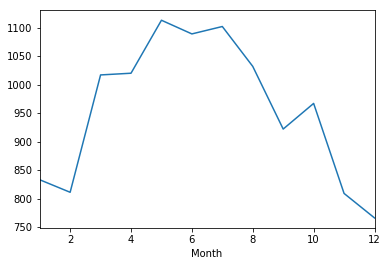

In [498]:
from datetime import datetime

def month(m):
    return m.month

#keep in mind that grabbing a column from a df, is really grabbing a series
battery = df[df['PrimaryType'] == 'BATTERY']

battery['Month'] = battery.index.map(month)

#ASK: do you prefer I look at only one year compared to all years and then aggregate all months together?
month_groupby = battery.groupby(['Month'])['PrimaryType'].count().plot()
print(month_groupby)

#batt2 = battery['PrimaryType'].resample('M', kind='period').count()[:12].plot()
#print(batt2)

In [570]:
#TIME SERIES???

## [Q7 6 points] Plot the frequency of THEFT, BATTERY, and NARCOTICS versus HourOfDay in 3 subplots of 1 figure.

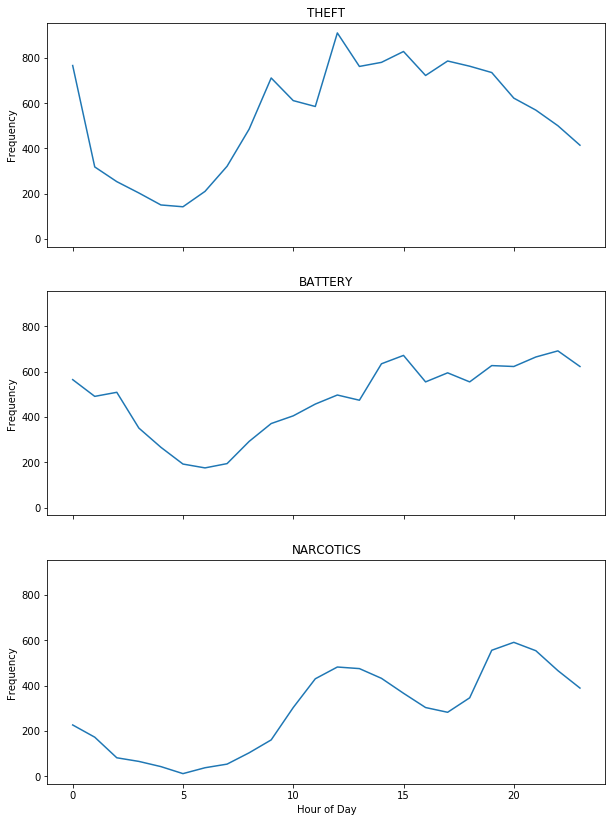

In [561]:
#fig, axes = plt.subplots(nrows=1, ncols=3)
#fig.subplots_adjust(hspace=1, wspace = .5)

fig, (ax1, ax2, ax3) = subplots(nrows=3,
                                ncols=1,
                                sharex=True,
                                sharey=True,
                                figsize=(10, 14))
#ax1.plot(c4['wt'], c4['mpg'], marker='o', color='blue', linestyle='None')

theft_df = df[df['PrimaryType'] == 'THEFT']
theft_groupby = theft_df.groupby(['HourOfDay'])['PrimaryType'].count()

battery_df = df[df['PrimaryType'] == 'BATTERY']
battery_groupby = battery_df.groupby(['HourOfDay'])['PrimaryType'].count()

narcotics_df = df[df['PrimaryType'] == 'NARCOTICS']
narcotics_groupby = narcotics_df.groupby(['HourOfDay'])['PrimaryType'].count()

ax1.plot(theft_groupby)
ax1.set_title('THEFT')
ax1.set_ylabel('Frequency')

ax2.plot(battery_groupby)
ax2.set_title('BATTERY')
ax2.set_ylabel('Frequency')

ax3.plot(narcotics_groupby)
ax3.set_title('NARCOTICS')
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Hour of Day')


## [Q8 6 points] Plot the frequency of complaints by street names for the 20 streets with the highest complaints.

If the Block is **024XX W CERMAK RD**, then the street name is **W CERMAK RD**.

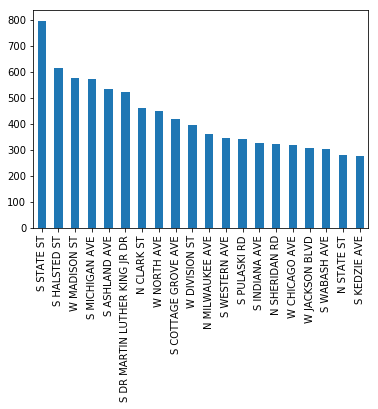

In [111]:
def street(s):
    #words = s.split()
    street = s.split(' ', 1)[1] #splits the entire address to now only include the street name
    return street

df['Streets'] = df['Block'].map(street)
streets = df['Streets'].value_counts()[:20].plot(kind="bar")
streets

## [Q9 5 points] Check if each complaint has a unique Case Number.

In [72]:
case = df['Case Number'].drop_duplicates()

print 'Length of case numbers in entire df: ' + str(len(df))
print 'Length of unique case numbers: ' + str(len(case))

### yes, each case number is unique in this dataframe

Length of case numbers in entire df: 63008
Length of unique case numbers: 63008


## [Q10 5 points] How many IUCR codes correspond to a single Primary Type?

In [572]:
#iucr = df.groupby(['PrimaryType'])['IUCR'].count()
#iucr

#for each iucr code, how many primary types does it show up with??
#select iucr code that only has one primary type that corresponds to it

iucr_primary = df.groupby(['IUCR', 'PrimaryType'])['PrimaryType'].agg(['count'])
iucr_primary
singleprimary = iucr_primary[iucr_primary['count'] == 1]
singleprimary

print 'There are ', str(len(singleprimary)), " IUCR's with only a single primary type."

There are  27  IUCR's with only a single primary type.


,,count
IUCR,PrimaryType,
0110,HOMICIDE,90
0261,CRIM SEXUAL ASSAULT,19
0263,CRIM SEXUAL ASSAULT,10
0264,CRIM SEXUAL ASSAULT,2
0265,CRIM SEXUAL ASSAULT,41
0266,CRIM SEXUAL ASSAULT,34
0273,CRIM SEXUAL ASSAULT,2
0275,CRIM SEXUAL ASSAULT,2
0281,CRIM SEXUAL ASSAULT,125


## [Q11 6 points] Among Locations with at least 1000 complaints, what are the most frequent Primary Types?

In [568]:
#ASK: is there an easier way to create a mask for finding locations with at least 1000 complaints and applying it to df???

#have to compare to location index??
location = df[df.groupby('Location')['Location'].transform('size') >=1000]

#have to look at the most frequent primary types for each top location (with at least 1000 complaints)
df3 = location.groupby(['Location', 'PrimaryType'])['PrimaryType'].agg(['count'])

#one way of getting the most frequent primary type for each location
df4 = df3.groupby('Location').idxmax()
df4

#ANOTHER WAY OF DOING THIS
#if we want max, use MAX()
unstacked = df3.unstack('PrimaryType').T
most_common = DataFrame({'Most common PrimaryType':unstacked.idxmax(), 'Frequency':unstacked.max()})
most_common

,Frequency,Most common PrimaryType
Location,,
ALLEY,426.0,"(count, NARCOTICS)"
APARTMENT,2201.0,"(count, BATTERY)"
OTHER,799.0,"(count, THEFT)"
PARKING LOT/GARAGE(NON.RESID.),703.0,"(count, THEFT)"
RESIDENCE,2398.0,"(count, BATTERY)"
RESIDENCE PORCH/HALLWAY,304.0,"(count, BATTERY)"
RESIDENCE-GARAGE,585.0,"(count, BURGLARY)"
"SCHOOL, PUBLIC, BUILDING",471.0,"(count, BATTERY)"
SIDEWALK,2223.0,"(count, NARCOTICS)"


## [Q12 6 points] Among all offenses with the word THEFT in the description, select the ones that occur at least 5 times, and sort them in descending order of the fraction of arrests for that offense.

In [494]:
def theft(s):
    """Given a Description Type string, return True if it is
       a THEFT-related complaint."""
    return (len(re.findall('THEFT', s)) > 0)

theft_mask = df['Description'].map(theft) 
theft = df[theft_mask]      #new df with descriptions only containing 'THEFT'
theft['Description'].value_counts()

theft2 = theft.groupby(['Description'])['Arrest'].agg(['mean', 'count']).sort_values(by='mean', ascending = False)
atleast5 = theft2[theft2['count'] >= 5]
atleast5

,mean,count
Description,,
THEFT OF LOST/MISLAID PROP,0.851852,81
RETAIL THEFT,0.621191,1444
THEFT OF LABOR/SERVICES,0.555921,304
THEFT/RECOVERY: AUTOMOBILE,0.303797,237
ATTEMPT THEFT,0.280899,89
"THEFT BY LESSEE,MOTOR VEH",0.190476,42
"THEFT/RECOVERY: TRUCK,BUS,MHOME",0.150000,20
AGG: FINANCIAL ID THEFT,0.058824,34
ATTEMPT - FINANCIAL IDENTITY THEFT,0.058824,17


## [Q13 10 points] Use a Logistic Regression classifier to predict Arrest using PrimaryType and Domestic. Split the data into 70% train and 30% test. Report accuracy on the test set. Also report accuracy of the baseline classifier on the test set.

In [495]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Get the baseline
mask_arrest = (df['Arrest'] == 0)
baseline = float(len(df[mask_arrest])) / float(len(df))
print 'Baseline: ' + str(baseline)

# Create the formula
formula = 'Arrest ~ 0 + PrimaryType + Domestic'

# Get the design matrices
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['Arrest'].values

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Build the model
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Test on the training 
prediction = model.predict(X_test)
print 'Model: ' + str(metrics.accuracy_score(y_test, prediction))

Populating the interactive namespace from numpy and matplotlib
Baseline: 0.715972574911
Model: 0.8586996773


## [Q14 5 points] Using the results of Logistic Regression above, find the top 5 features that indicate lower chances of Arrest, and the top 5 indicating highest chances of Arrest.

In [496]:
# Get the weights of each feature# Get th 
weights = Series(model.coef_[0], index=X.columns.values)
print weights.sort_values()[:5]
print
print weights.sort_values(ascending=False)[:5]

PrimaryType[BURGLARY]              -2.709467
PrimaryType[CRIMINAL DAMAGE]       -2.299871
PrimaryType[ROBBERY]               -2.184952
PrimaryType[MOTOR VEHICLE THEFT]   -1.990109
PrimaryType[THEFT]                 -1.861292
dtype: float64

PrimaryType[NARCOTICS]                           5.072023
PrimaryType[PROSTITUTION]                        4.532135
PrimaryType[LIQUOR LAW VIOLATION]                3.463085
PrimaryType[GAMBLING]                            3.404301
PrimaryType[INTERFERENCE WITH PUBLIC OFFICER]    2.250300
dtype: float64
